# Объявления о продаже KIA Ceed (2013 - 2021 года выпуска). 

## Данные с сайта nettiauto.com на основе 1662 объявлений

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set options
pd.set_option("max_colwidth", 100)

# library & dataset
import seaborn as sns

## 1. Просмотр датасета

In [2]:
df = pd.read_csv('nettiauto_kia_ceed.csv')

In [3]:
df.head(3)

,Merkki,Vuosi,Ajettu,Hinta,Date
0,Make & model|Year|Mileage|Price|Sold date,Year,Mileage,Price,Sold date
1,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid ActiveEdtion|2019|23 000|23 850 €|06-2021",2019,23 000,23 850 €,06-2021
2,"Toyota Auris (1.8) Touring Sports 1,8 Hybrid Active Edition|2019|37 000|22 980 €|08-2021",2019,37 000,22 980 €,08-2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Merkki  4196 non-null   object
 1   Vuosi   4196 non-null   object
 2   Ajettu  4196 non-null   object
 3   Hinta   4196 non-null   object
 4   Date    4196 non-null   object
dtypes: object(5)
memory usage: 164.0+ KB


## 2. Чистка датасета

In [5]:
# переименуем столбцы
df = df.rename(columns = {'Merkki': 'model_description',
                         'Vuosi': 'Year',
                         'Ajettu': 'Mileage',
                         'Hinta': 'Price',
                         'Date': 'Sold_date'})

In [6]:
# удалим пробелы
df['Mileage'] = df['Mileage'].str.replace(" ", "")
df['Price'] = df['Price'].str.replace(" ", "")

In [7]:
# разделим датасеты
df = df.loc[2534:]
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
2534,"KIA Ceed (1) 1,0 T-GDI 100hv LX SW *** 0 % korko, 0 € kulut, Kysy saatavuudesta!, J. kotiintoim...",2021,Eiilmoitettu,20885€,09-2021
2535,"KIA Ceed (1) 1,0 T-GDI Mild-Hybrid 120hv LX 5D DCTKevyrhybridi jopa 3.000€ edulla & korko 0,49% ...",2021,Eiilmoitettu,24382€(sis.ALV),06-2021
2536,"KIA Ceed (1) 1,0 T-GDI Mild-Hybrid 120hv LX SW DCT Kevyrhybridi jopa 3.000€ edulla & korko 0,49%...",2021,Eiilmoitettu,25062€(sis.ALV),06-2021


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662 entries, 2534 to 4195
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   model_description  1662 non-null   object
 1   Year               1662 non-null   object
 2   Mileage            1662 non-null   object
 3   Price              1662 non-null   object
 4   Sold_date          1662 non-null   object
dtypes: object(5)
memory usage: 65.1+ KB


In [9]:
# удалим лишнее Vuosi
df = df.drop(df.query('Year == "Vuosi"').index.values.tolist())
df = df.drop(df.query('Year == "Year"').index.values.tolist())

# удалим данные где дата продажи 0
drop_nulls = df.query('Sold_date == "00-0000"').index.values.tolist()
df = df.drop(drop_nulls)

In [10]:
df['Year'].unique()

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013'], dtype=object)

In [11]:
# приведем к формату времени
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [12]:
# приведем к формату времени
df['Sold_date'] = pd.to_datetime(df['Sold_date'], format='%m-%Y')

In [13]:
# удалим данные где мили Eiilmoitettu
drop_next = df[df['Mileage'] == 'Eiilmoitettu'].index.values.tolist()
for i in drop_next:
    df = df.drop(index = i)

In [14]:
# удалим данные где мили Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [15]:
# удалим данные где не указан пробег
drop_ns = df[df['Mileage'] == 'Notspecified'].index.values.tolist()
for i in drop_ns:
    df = df.drop(index = i)

In [16]:
# мили целочисленные значения
df['Mileage'] = df['Mileage'].astype('float64') 

In [17]:
# цена 5 знаков
df['Price'] = df['Price'].str[:5]
# удалим пробелы
df['Price'] = df['Price'].str.replace("€", "")

In [18]:
# удалим данные где цена Eihin
drop_a = df[df['Price'] == 'Eihin'].index.values.tolist()
for i in drop_a:
    df = df.drop(index = i)

In [19]:
# удалим данные где цена Notpr
drop_nt = df[df['Price'] == 'Notpr'].index.values.tolist()
for i in drop_nt:
    df = df.drop(index = i)

In [20]:
# сделаем цену целочисленным значением
df['Price'] = df['Price'].astype(int) 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 2539 to 4195
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  1342 non-null   object        
 1   Year               1342 non-null   datetime64[ns]
 2   Mileage            1342 non-null   float64       
 3   Price              1342 non-null   int64         
 4   Sold_date          1342 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 62.9+ KB


In [22]:
df.head(3)

,model_description,Year,Mileage,Price,Sold_date
2539,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW**Nyt tähän autoon korko 0%+kulut**|2021|9 000|24 900 €(sis....",2021-01-01,9000.0,24900,2021-07-01
2540,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *** 0 % korko, 0 € kulut, J. kotiintoimitus|2021|850|26 40...",2021-01-01,850.0,26400,2021-07-01
2542,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *Comfort paketti* *** 0 % korko, 0 € kulut, J. kotiintoimi...",2021-01-01,1.0,27397,2021-05-01


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 2539 to 4195
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   model_description  1342 non-null   object        
 1   Year               1342 non-null   datetime64[ns]
 2   Mileage            1342 non-null   float64       
 3   Price              1342 non-null   int64         
 4   Sold_date          1342 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 62.9+ KB


In [24]:
df['Age'] = (df['Sold_date'] - df['Year']) / np.timedelta64(1, 'Y')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age
2539,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW**Nyt tähän autoon korko 0%+kulut**|2021|9 000|24 900 €(sis....",2021-01-01,9000.0,24900,2021-07-01,0.495561
2540,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *** 0 % korko, 0 € kulut, J. kotiintoimitus|2021|850|26 40...",2021-01-01,850.0,26400,2021-07-01,0.495561
2542,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *Comfort paketti* *** 0 % korko, 0 € kulut, J. kotiintoimi...",2021-01-01,1.0,27397,2021-05-01,0.328549


In [25]:
df.describe()

,Mileage,Price,Age
count,1342.000000,1342.000000,1342.000000
mean,80905.559613,15248.628167,4.976289
std,58404.051510,5951.463510,2.367438
min,1.000000,4300.000000,0.328549
25%,34000.000000,10950.000000,3.329295
50%,72000.000000,13885.000000,5.415580
75%,116000.000000,17900.000000,6.748941
max,340000.000000,38000.000000,8.832488


In [26]:
# дропнем аномалию c пробегом
# max = df['Mileage'].max()
# drop_max = df.query('Mileage == 1310000').index.values.tolist()
# df = df.drop(drop_max)
# df.head(3)

In [27]:
# сделаем градацию по пробегу 

def mileage(col):
    if col < 20000:
        return "< 20000"
    elif 20000 <= col < 50000 :
        return "20000 - 49999"
    elif 50000 <= col < 79999 :
        return "50000 - 79999"
    elif 80000 <= col < 100000 :
        return "80000 - 99999"
    else:
        return ">= 100000"

# произведем замену значений в DF
df['mileage_range'] = df['Mileage'].apply(mileage)

In [28]:
# сделаем градацию по пробегу 

def ages_range(col):
    if col < 3:
        return "< 3"
    elif 3 <= col < 5 :
        return "3 - 4"
    elif 5 <= col < 8 :
        return "5 - 7"
    else:
        return ">= 8"

# произведем замену значений в DF
df['age_range'] = df['Age'].apply(ages_range)

#### смотрим двигатели

In [29]:
# посмотрим на мотор
df['engine'] = df['model_description'].str.extract(r'(\d.\d)')
df.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
2539,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW**Nyt tähän autoon korko 0%+kulut**|2021|9 000|24 900 €(sis....",2021-01-01,9000.0,24900,2021-07-01,0.495561,< 20000,< 3,1.5
2540,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *** 0 % korko, 0 € kulut, J. kotiintoimitus|2021|850|26 40...",2021-01-01,850.0,26400,2021-07-01,0.495561,< 20000,< 3,1.5
2542,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *Comfort paketti* *** 0 % korko, 0 € kulut, J. kotiintoimi...",2021-01-01,1.0,27397,2021-05-01,0.328549,< 20000,< 3,1.5


In [30]:
df['engine'].unique()

array(['1.5', '1,0', '1.6', '1.4', '202', '150', '201', '1.0'],
      dtype=object)

In [31]:
# выбросы "201=(2.0)", "2,0=(2.0)", "0,9=(2.0)"
df.query('engine == "201"')

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
3021,KIA Ceed (1) Spirit|2019|14 000|19 390 €|05-2021,2019-01-01,14000.0,19390,2021-05-01,2.329959,< 20000,< 3,201
3058,KIA Ceed (1)|2019|35 000|19 875 €|09-2021,2019-01-01,35000.0,19875,2021-09-01,2.666721,20000 - 49999,< 3,201
3182,KIA Ceed (1)|2018|38 000|18 900 €|07-2021,2018-01-01,38000.0,18900,2021-07-01,3.496307,20000 - 49999,3 - 4,201
3246,KIA Ceed (1)|2018|66 000|13 500 €|08-2021,2018-01-01,66000.0,13500,2021-08-01,3.581182,50000 - 79999,3 - 4,201
3365,KIA Ceed (1)|2017|30 000|13 500 €|06-2021,2017-01-01,30000.0,13500,2021-06-01,4.413506,20000 - 49999,3 - 4,201
3428,KIA Ceed (1) / Navi / Kamera / Tutka|2017|71 000|15 890 €|11-2021,2017-01-01,71000.0,15890,2021-11-01,4.832406,50000 - 79999,3 - 4,201
3476,KIA Ceed (1)|2017|80 000|12 900 €|11-2021,2017-01-01,80000.0,12900,2021-11-01,4.832406,80000 - 99999,3 - 4,201
3495,KIA Ceed (1)|2016|79 000|12 000 €|06-2021,2016-01-01,79000.0,12000,2021-06-01,5.415580,50000 - 79999,5 - 7,201
3521,KIA Ceed (1) SIISTI / VÄHÄN AJETTU / JUURI KATSASTETTU|2016|89 900|9 900 €|09-2021,2016-01-01,89900.0,9900,2021-09-01,5.667468,80000 - 99999,5 - 7,201
3569,KIA Ceed (1)|2016|57 100|11 900 €|07-2021,2016-01-01,57100.0,11900,2021-07-01,5.497717,50000 - 79999,5 - 7,201


In [32]:
df.loc[df['engine'] == '201','engine'] = '1.0'
df.loc[df['engine'] == '1,0','engine'] = '1.0'
df.loc[df['engine'] == '202','engine'] = '1.0'
df.loc[df['engine'] == '150','engine'] = '1.0'
df.loc[df['engine'] == '201','engine'] = '1.0'

## 3. Графики 

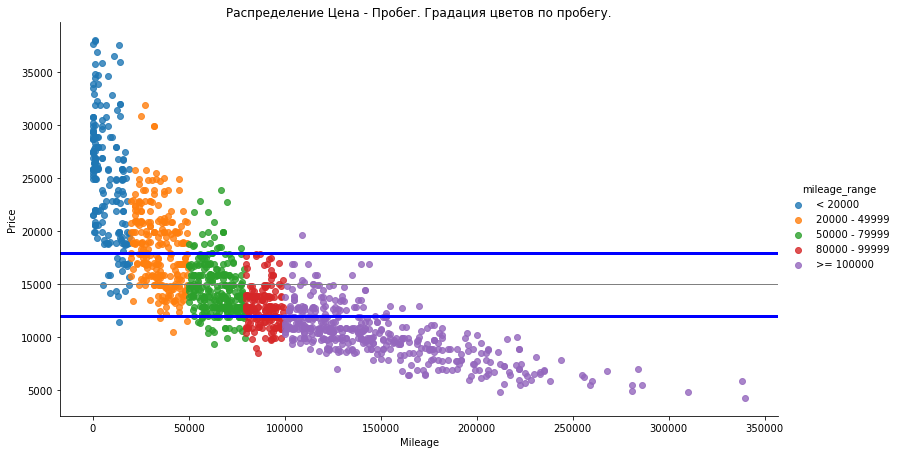

In [33]:
up_limit_budget = 18000
target_limit_budget = 15000
low_limit_budget = 12000
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='mileage_range', 
           legend=True, 
           height=6, 
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по пробегу.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

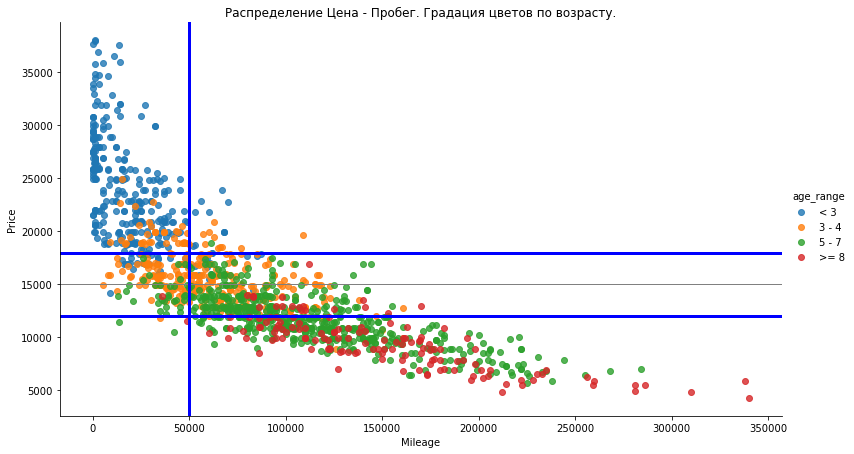

In [34]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='age_range', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по возрасту.");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axvline(50000, linestyle = '-', color ='blue', linewidth = 3);

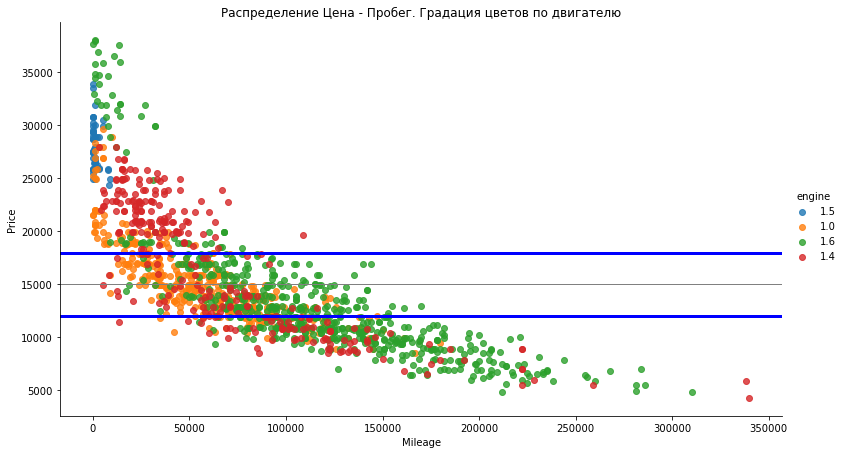

In [35]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Mileage", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           hue='engine', 
           legend=True, 
           height=6,
           aspect=15/8.27);
ax = plt.gca();
ax.set_title("Распределение Цена - Пробег. Градация цветов по двигателю");
plt.axhline(up_limit_budget, linestyle = '-', color ='blue', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='blue', linewidth = 3);

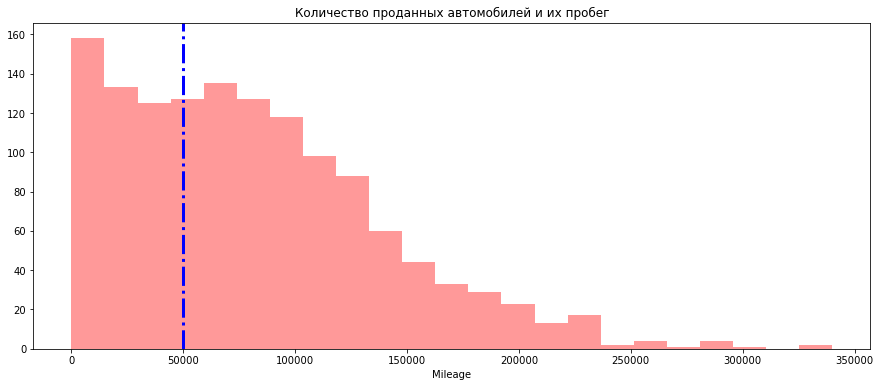

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
sns.distplot( df['Mileage'], 
             hist=True, 
             kde=False, 
             rug=False, 
             color="red" ).set_title('Количество проданных автомобилей и их пробег');
plt.axvline(50000, linestyle = '-.', color ='blue', linewidth = 3);
plt.xlabel("Mileage");

In [37]:
pivot_report = pd.pivot_table(df, 
                              values='Price', 
                              index=['engine'], 
                              aggfunc={'count','median'}).reset_index()
pivot_report

,engine,count,median
0,1.0,411.0,14800.0
1,1.4,287.0,17890.0
2,1.5,56.0,27448.5
3,1.6,588.0,11900.0


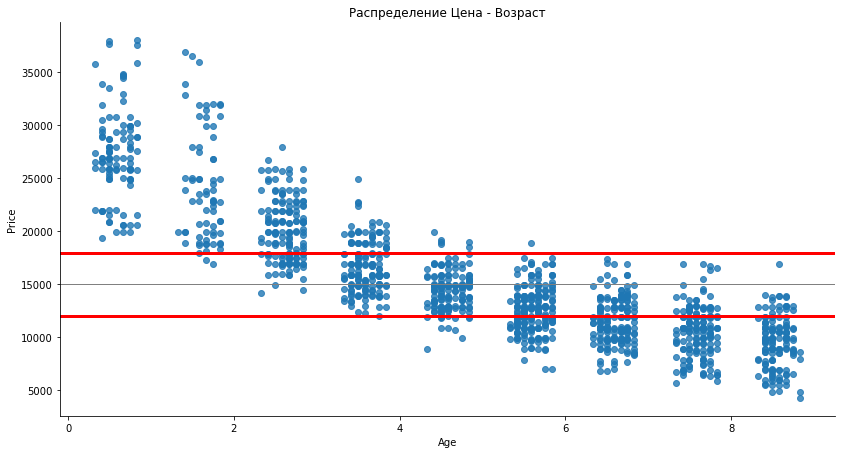

In [38]:
#fig, ax = plt.subplots(figsize=(15,6))
#ax.set_title("Распределение Год - Цена");
#use the function regplot to make a scatterplot
#sns.regplot(x=df["Age"], y=df["Price"]);

sns.lmplot(x="Age", 
           y="Price", 
           data=df, 
           fit_reg=False, 
           legend=False,
           height=6,
           aspect=16/8.27)
ax = plt.gca();
ax.set_title("Распределение Цена - Возраст");
plt.axhline(up_limit_budget, linestyle = '-', color ='red', linewidth = 3);
plt.axhline(target_limit_budget, linestyle = '-', color ='grey', linewidth = 1);
plt.axhline(low_limit_budget, linestyle = '-', color ='red', linewidth = 3);

In [39]:
df.corr()

,Mileage,Price,Age
Mileage,1.000000,-0.791710,0.763182
Price,-0.791710,1.000000,-0.850094
Age,0.763182,-0.850094,1.000000


## 4. Выборка из того, что интересно для покупки

In [40]:
int = df[(df['mileage_range'] == '< 20000')|(df['mileage_range'] == '20000 - 49999')]
int.head(3)

,model_description,Year,Mileage,Price,Sold_date,Age,mileage_range,age_range,engine
2539,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW**Nyt tähän autoon korko 0%+kulut**|2021|9 000|24 900 €(sis....",2021-01-01,9000.0,24900,2021-07-01,0.495561,< 20000,< 3,1.5
2540,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *** 0 % korko, 0 € kulut, J. kotiintoimitus|2021|850|26 40...",2021-01-01,850.0,26400,2021-07-01,0.495561,< 20000,< 3,1.5
2542,"KIA Ceed (1.5) 1,5 T-GDI 160hv EX SW *Comfort paketti* *** 0 % korko, 0 € kulut, J. kotiintoimi...",2021-01-01,1.0,27397,2021-05-01,0.328549,< 20000,< 3,1.5


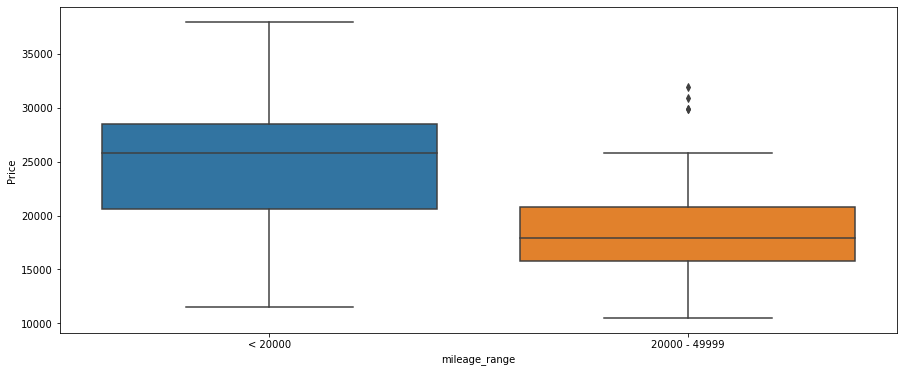

In [41]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Price"] );

In [42]:
new = df[df['mileage_range'] == '< 20000']
semi_new = df[df['mileage_range'] == '20000 - 49999']

In [49]:
new_price = new['Price'].median()
new_age = new['Age'].median()
print('медианная цена KIA CEED с пробегом до 20 000 км = {:.2f}, возраст автомобиля = {:.3f}'.format(new_price,new_age))

медианная цена KIA CEED с пробегом до 20 000 км = 25768.00, возраст автомобиля = 0.832


In [48]:
seminew_price = semi_new['Price'].median()
seminew_age = semi_new['Age'].median()
print('медианная цена KIA CEED с пробегом от 20000 км до 49999 км = {:.2f}, возраст автомобиля = {:.3f}'.format(seminew_price,seminew_age))

медианная цена KIA CEED с пробегом от 20000 км до 49999 км = 17900.00, возраст автомобиля = 3.329


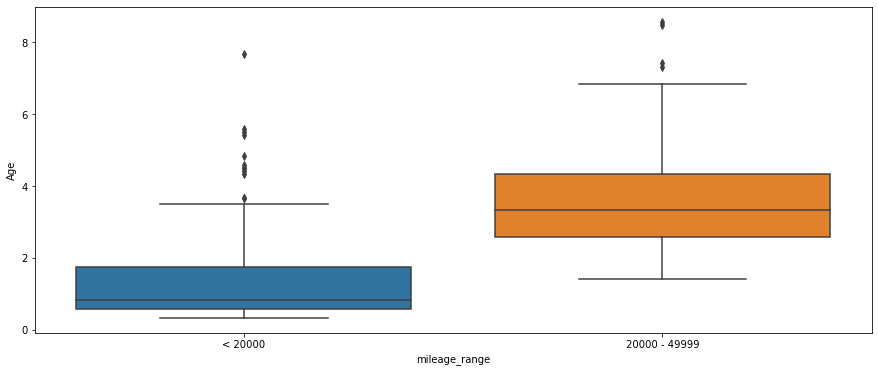

In [45]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot( x=int["mileage_range"], y=int["Age"] );

In [46]:
start_range = semi_new['Price'].quantile(0.25) # 25%
end_range = semi_new['Price'].quantile(0.5) # 50%

In [50]:
print('выгодная цена для KIA CEED c пробегом от 20000 км до 49999 км = {:.2f} - {:.2f}'.format(start_range,end_range))

выгодная цена для KIA CEED c пробегом от 20000 км до 49999 км = 15787.50 - 17900.00


### Выводы

- медианная цена KIA CEED с пробегом до 20 000 км = 25768.00, возраст автомобиля = 0.832

- медианная цена KIA CEED с пробегом от 20000 км до 49999 км = 17900.00, возраст автомобиля = 3.329

- выгодная цена для KIA CEED c пробегом от 20000 км до 49999 км = 15787.50 - 17900.00